# Google Stock Price Prediction

You can download the dataset from kaggle : https://www.kaggle.com/ptheru/googledta

In [140]:
# This code is related to limiting the tensorflow GPU ---------------------------
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
            logical_gpus = tf.config.experimental.list_logical_devices('GPU')
            print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

In [141]:
# importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [142]:
df = pd.read_csv('google_data_trainset.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


In [143]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1254,2017-12-22,1061.109985,1064.199951,1059.439941,1060.119995,1060.119995,755100
1255,2017-12-26,1058.069946,1060.119995,1050.199951,1056.739990,1056.739990,760600
1256,2017-12-27,1057.390015,1058.369995,1048.050049,1049.369995,1049.369995,1271900
1257,2017-12-28,1051.599976,1054.750000,1044.770020,1048.140015,1048.140015,837100
1258,2017-12-29,1046.719971,1049.699951,1044.900024,1046.400024,1046.400024,887500


In [144]:
# We are having the data from 1st August 2013 to 29th December 2017
# lets take only the Open column for analysis
X = df.iloc[:,1:2].values
X.shape

(1259, 1)

In [145]:
X

array([[ 357.385559],
       [ 360.122742],
       [ 362.313507],
       ...,
       [1057.390015],
       [1051.599976],
       [1046.719971]])

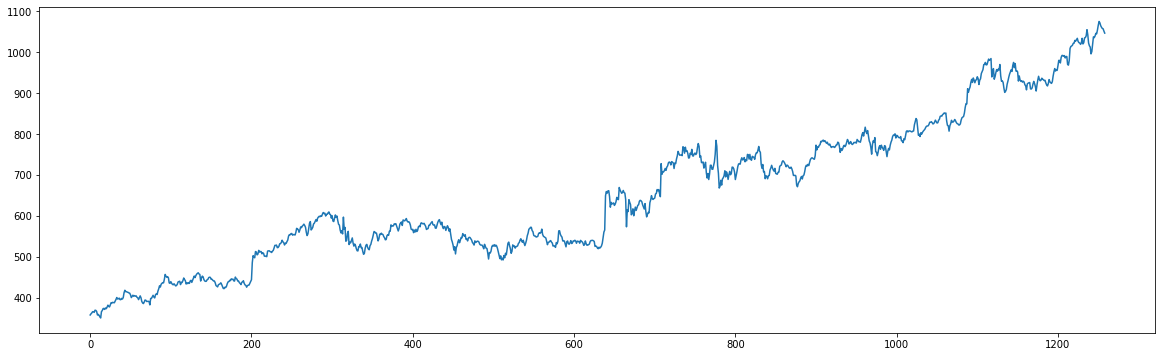

In [146]:
plt.figure(figsize=(20,6))
plt.plot(X)

# Feature Scaling 

In [147]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1)) # converting into values from 0-1
train_scaled = sc.fit_transform(X)
max(train_scaled),min(train_scaled) # Sanity check ....MinMax Scaler transforms the values between 0-1

(array([1.]), array([0.]))

In [148]:
train_scaled.shape

(1259, 1)

In [149]:
# Now we need to create data structure with some t time stamps
x_train = []
y_train = []

for i in range(60,len(train_scaled)):
    
    x_train.append(train_scaled[i-60:i,0])
    y_train.append(train_scaled[i,0])
    
x_train , y_train = np.array(x_train) , np.array(y_train)

In [150]:
x_train.shape

(1199, 60)

In [151]:
#x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1)) # converting into 3D tensors
x_train = x_train.reshape(1199,60,1)

In [152]:
x_train.shape

(1199, 60, 1)

## Creating the Model

In [153]:
import tensorflow as tf
#from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM , Dropout , Dense

In [154]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(60,1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='Adam',
              loss='mean_squared_error',
              metrics=['mean_squared_error']
              )

model.fit(x_train,y_train,epochs=100,batch_size=32)



Train on 1199 samples
Epoch 1/100
1199/1199 [==============================] - 5s 4ms/sample - loss: 0.0247 - mean_squared_error: 0.0247
Epoch 2/100
1199/1199 [==============================] - 0s 371us/sample - loss: 0.0048 - mean_squared_error: 0.0048
Epoch 3/100
1199/1199 [==============================] - 0s 373us/sample - loss: 0.0041 - mean_squared_error: 0.0041
Epoch 4/100
1199/1199 [==============================] - 0s 374us/sample - loss: 0.0042 - mean_squared_error: 0.0042
Epoch 5/100
1199/1199 [==============================] - 0s 371us/sample - loss: 0.0050 - mean_squared_error: 0.0050
Epoch 6/100
1199/1199 [==============================] - 0s 374us/sample - loss: 0.0035 - mean_squared_error: 0.0035
Epoch 7/100
1199/1199 [==============================] - 0s 372us/sample - loss: 0.0036 - mean_squared_error: 0.0036
Epoch 8/100
1199/1199 [==============================] - 0s 415us/sample - loss: 0.0040 - mean_squared_error: 0.0040
Epoch 9/100
1199/1199 [=====================

1199/1199 [==============================] - 0s 362us/sample - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 71/100
1199/1199 [==============================] - 0s 374us/sample - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 72/100
1199/1199 [==============================] - 0s 365us/sample - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 73/100
1199/1199 [==============================] - 0s 373us/sample - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 74/100
1199/1199 [==============================] - 0s 387us/sample - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 75/100
1199/1199 [==============================] - 0s 391us/sample - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 76/100
1199/1199 [==============================] - 0s 369us/sample - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 77/100
1199/1199 [==============================] - 0s 367us/sample - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 78/100
1199/1199 [==============================] - 0s 369us/sa

# Predictions on the test dataset

In [155]:
test_data = pd.read_csv('google_data_testset.csv')
test_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,1048.339966,1066.939941,1045.229980,1065.000000,1065.000000,1237600
1,2018-01-03,1064.310059,1086.290039,1063.209961,1082.479980,1082.479980,1430200
2,2018-01-04,1088.000000,1093.569946,1084.001953,1086.400024,1086.400024,1004600
3,2018-01-05,1094.000000,1104.250000,1092.000000,1102.229980,1102.229980,1279100
4,2018-01-08,1102.229980,1111.270020,1101.619995,1106.939941,1106.939941,1047600


In [156]:
test_data['Open'].shape

(125,)

In [157]:
real_stock_price = test_data.iloc[:,1:2].values

In [158]:
real_stock_price.shape

(125, 1)

In [159]:
real_stock_price

array([[1048.339966],
       [1064.310059],
       [1088.      ],
       [1094.      ],
       [1102.22998 ],
       [1109.400024],
       [1097.099976],
       [1106.300049],
       [1102.410034],
       [1132.51001 ],
       [1126.219971],
       [1131.410034],
       [1131.829956],
       [1137.48999 ],
       [1159.849976],
       [1177.329956],
       [1172.530029],
       [1175.079956],
       [1176.47998 ],
       [1167.829956],
       [1170.569946],
       [1162.609985],
       [1122.      ],
       [1090.599976],
       [1027.180054],
       [1081.540039],
       [1055.410034],
       [1017.25    ],
       [1048.      ],
       [1045.      ],
       [1048.949951],
       [1079.069946],
       [1088.410034],
       [1090.569946],
       [1106.469971],
       [1116.189941],
       [1112.640015],
       [1127.800049],
       [1141.23999 ],
       [1123.030029],
       [1107.869995],
       [1053.079956],
       [1075.140015],
       [1099.219971],
       [1089.189941],
       [11

In [160]:
df['Open'].shape

(1259,)

In [161]:
dataset_total = pd.concat((df['Open'],test_data['Open']),axis=0)

In [162]:
dataset_total

0       357.385559
1       360.122742
2       362.313507
3       365.348755
4       365.393463
          ...     
120    1143.599976
121    1128.000000
122    1121.339966
123    1102.089966
124    1120.000000
Name: Open, Length: 1384, dtype: float64

In [163]:
inputs = dataset_total[len(dataset_total) - len(test_data)-60:].values
inputs
# here we are simply taking the last 60 days record from our train data X

array([ 955.48999 ,  966.700012,  980.      ,  980.      ,  973.719971,
        987.450012,  992.      ,  992.099976,  990.289978,  991.77002 ,
        986.      ,  989.440002,  989.52002 ,  970.      ,  968.369995,
        980.      , 1009.190002, 1014.      , 1015.219971, 1017.210022,
       1021.76001 , 1022.109985, 1028.98999 , 1027.27002 , 1030.52002 ,
       1033.98999 , 1026.459961, 1023.419983, 1022.590027, 1019.210022,
       1022.52002 , 1034.01001 , 1020.26001 , 1023.309998, 1035.      ,
       1035.869995, 1040.      , 1055.089966, 1042.680054, 1022.369995,
       1015.799988, 1012.659973,  995.940002, 1001.5     , 1020.429993,
       1037.48999 , 1035.5     , 1039.630005, 1046.119995, 1045.      ,
       1054.609985, 1066.079956, 1075.199951, 1071.780029, 1064.949951,
       1061.109985, 1058.069946, 1057.390015, 1051.599976, 1046.719971,
       1048.339966, 1064.310059, 1088.      , 1094.      , 1102.22998 ,
       1109.400024, 1097.099976, 1106.300049, 1102.410034, 1132.

In [164]:
inputs = inputs.reshape(-1,1)
inputs.shape

(185, 1)

In [165]:
inputs = sc.transform(inputs)
inputs.shape

(185, 1)

In [166]:
x_test = []
for i in range(60,185):
    x_test.append(inputs[i-60:i,0])

In [167]:
x_test = np.array(x_test)
x_test.shape

(125, 60)

In [168]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_test.shape

(125, 60, 1)

In [169]:
predicted_price = model.predict(x_test)

In [170]:
predicted_price = sc.inverse_transform(predicted_price) # Undo the scaling of X according to feature_range
predicted_price

array([[1021.6971 ],
       [1020.2168 ],
       [1022.5323 ],
       [1031.0117 ],
       [1042.2441 ],
       [1052.8689 ],
       [1061.1884 ],
       [1063.9282 ],
       [1064.1079 ],
       [1062.9072 ],
       [1066.6997 ],
       [1072.4886 ],
       [1078.3774 ],
       [1082.8378 ],
       [1086.411  ],
       [1092.7751 ],
       [1102.8281 ],
       [1111.6849 ],
       [1117.4724 ],
       [1120.4167 ],
       [1120.0122 ],
       [1118.6475 ],
       [1116.4637 ],
       [1107.9718 ],
       [1092.5331 ],
       [1067.124  ],
       [1050.1495 ],
       [1041.3744 ],
       [1032.698  ],
       [1029.0326 ],
       [1029.3842 ],
       [1031.8433 ],
       [1038.9824 ],
       [1048.5563 ],
       [1056.4797 ],
       [1063.0939 ],
       [1068.836  ],
       [1071.9749 ],
       [1075.1288 ],
       [1080.3071 ],
       [1082.6259 ],
       [1079.6598 ],
       [1065.5076 ],
       [1051.4785 ],
       [1047.1531 ],
       [1049.5303 ],
       [1058.6658 ],
       [1072.

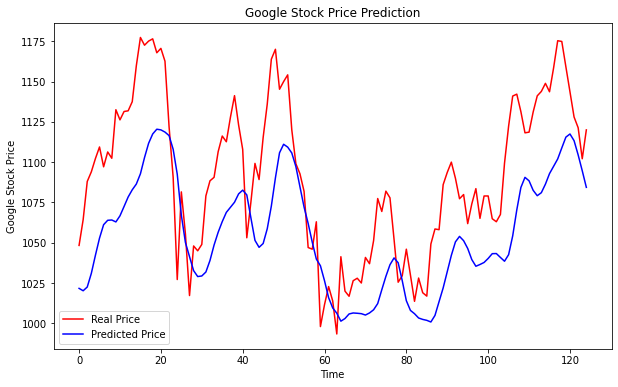

In [171]:
plt.figure(figsize=(10,6))
plt.plot(real_stock_price, color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()